**PYTHON LIBRARIES**

In [454]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve,f1_score,recall_score,precision_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")


**DATA READING**

In [455]:
data=pd.read_csv("C:\\Users\\Hp\\Desktop\\PyProject\\Tutorial_projects\\tutorial_heart1.csv")


In [456]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1


In [457]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,289.000000,303.000000,303.000000,282.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.501730,0.148515,0.528053,148.815603,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,52.332545,0.356198,0.525860,22.992991,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [458]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      289 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  282 non-null    float64
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [459]:
data.isnull().sum()

age          0
sex          0
cp           0
trtbps       0
chol        14
fbs          0
restecg      0
thalachh    21
exng         0
oldpeak      0
slp          0
caa          0
thall        0
output       0
dtype: int64

**DATA PRE PROCESSING**

In [460]:

'''col_with_null = ['chol','thalachh']
imputer=SimpleImputer(strategy='mean')
data[col_with_null] = imputer.fit_transform(data[col_with_null])'''


"col_with_null = ['chol','thalachh']\nimputer=SimpleImputer(strategy='mean')\ndata[col_with_null] = imputer.fit_transform(data[col_with_null])"

In [461]:

col_with_null = ['chol','thalachh']
data.dropna(subset=['chol'], inplace=True)
data.dropna(subset=['thalachh'], inplace=True)

print(data)


     age  sex  cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145  233.0    1        0     150.0     0      2.3    0   
1     37    1   2     130  250.0    0        1     187.0     0      3.5    0   
2     41    0   1     130  204.0    0        0     172.0     0      1.4    2   
3     56    1   1     120  236.0    0        1     178.0     0      0.8    2   
4     57    0   0     120  354.0    0        1     163.0     1      0.6    2   
..   ...  ...  ..     ...    ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140  241.0    0        1     123.0     1      0.2    1   
299   45    1   3     110  264.0    0        1     132.0     0      1.2    1   
300   68    1   0     144  193.0    1        1     141.0     0      3.4    1   
301   57    1   0     130  131.0    0        1     115.0     1      1.2    1   
302   57    0   1     130  236.0    0        0     174.0     0      0.0    1   

     caa  thall  output  
0      0     

In [462]:
#rechecking the data
data.isnull().sum()
data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       268 non-null    int64  
 1   sex       268 non-null    int64  
 2   cp        268 non-null    int64  
 3   trtbps    268 non-null    int64  
 4   chol      268 non-null    float64
 5   fbs       268 non-null    int64  
 6   restecg   268 non-null    int64  
 7   thalachh  268 non-null    float64
 8   exng      268 non-null    int64  
 9   oldpeak   268 non-null    float64
 10  slp       268 non-null    int64  
 11  caa       268 non-null    int64  
 12  thall     268 non-null    int64  
 13  output    268 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 31.4 KB


**DATA VISUALIZATION**

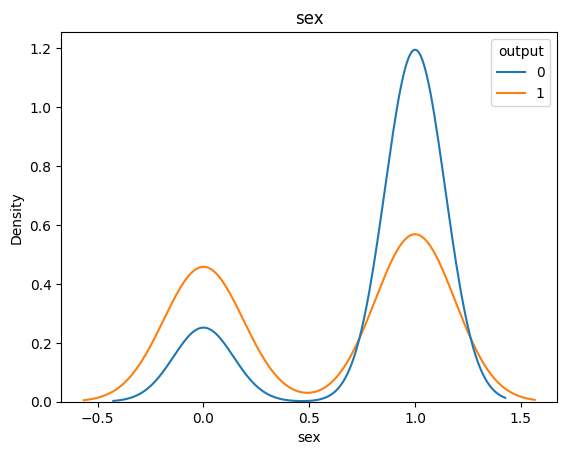

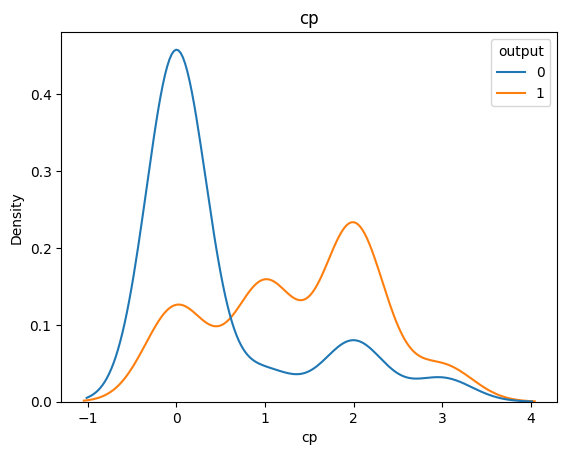

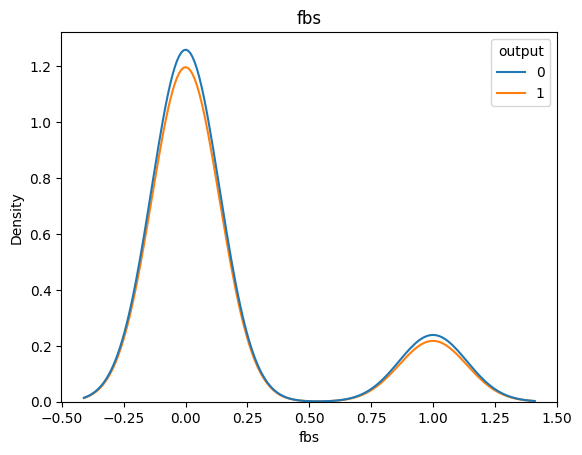

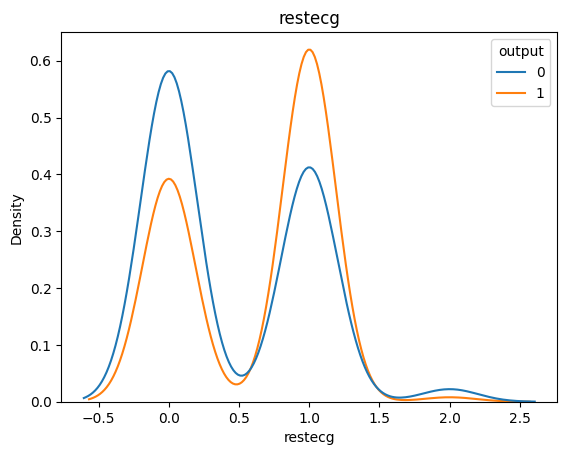

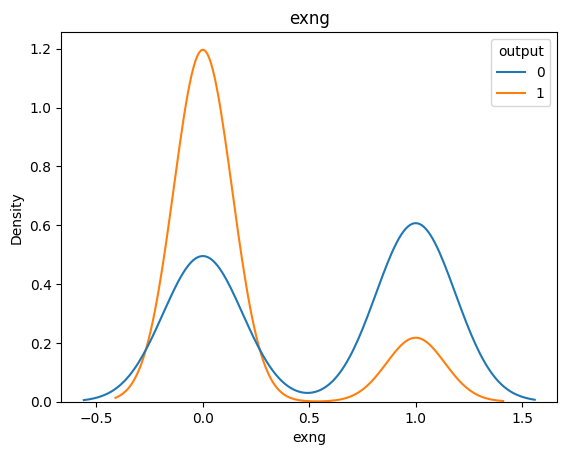

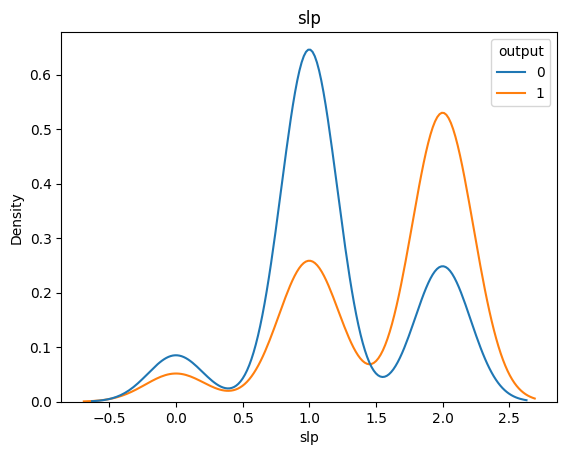

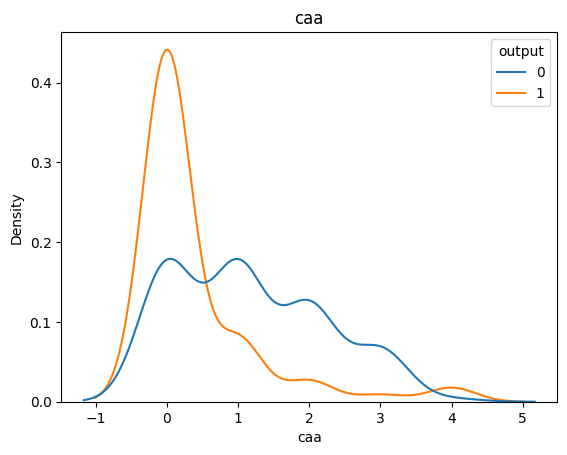

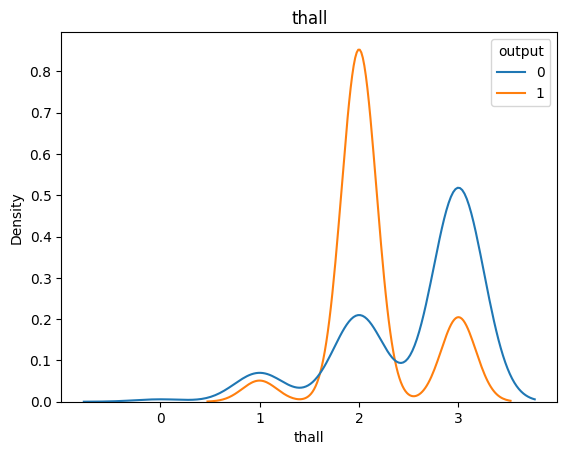

In [463]:
#Categorical Data Visualization
category_list=["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]
categorical_data= data.loc[:,category_list]
for i in category_list[:-1]:
    plt.figure()
    sns.kdeplot(x = i, data =categorical_data , hue = "output")
    plt.title(i)

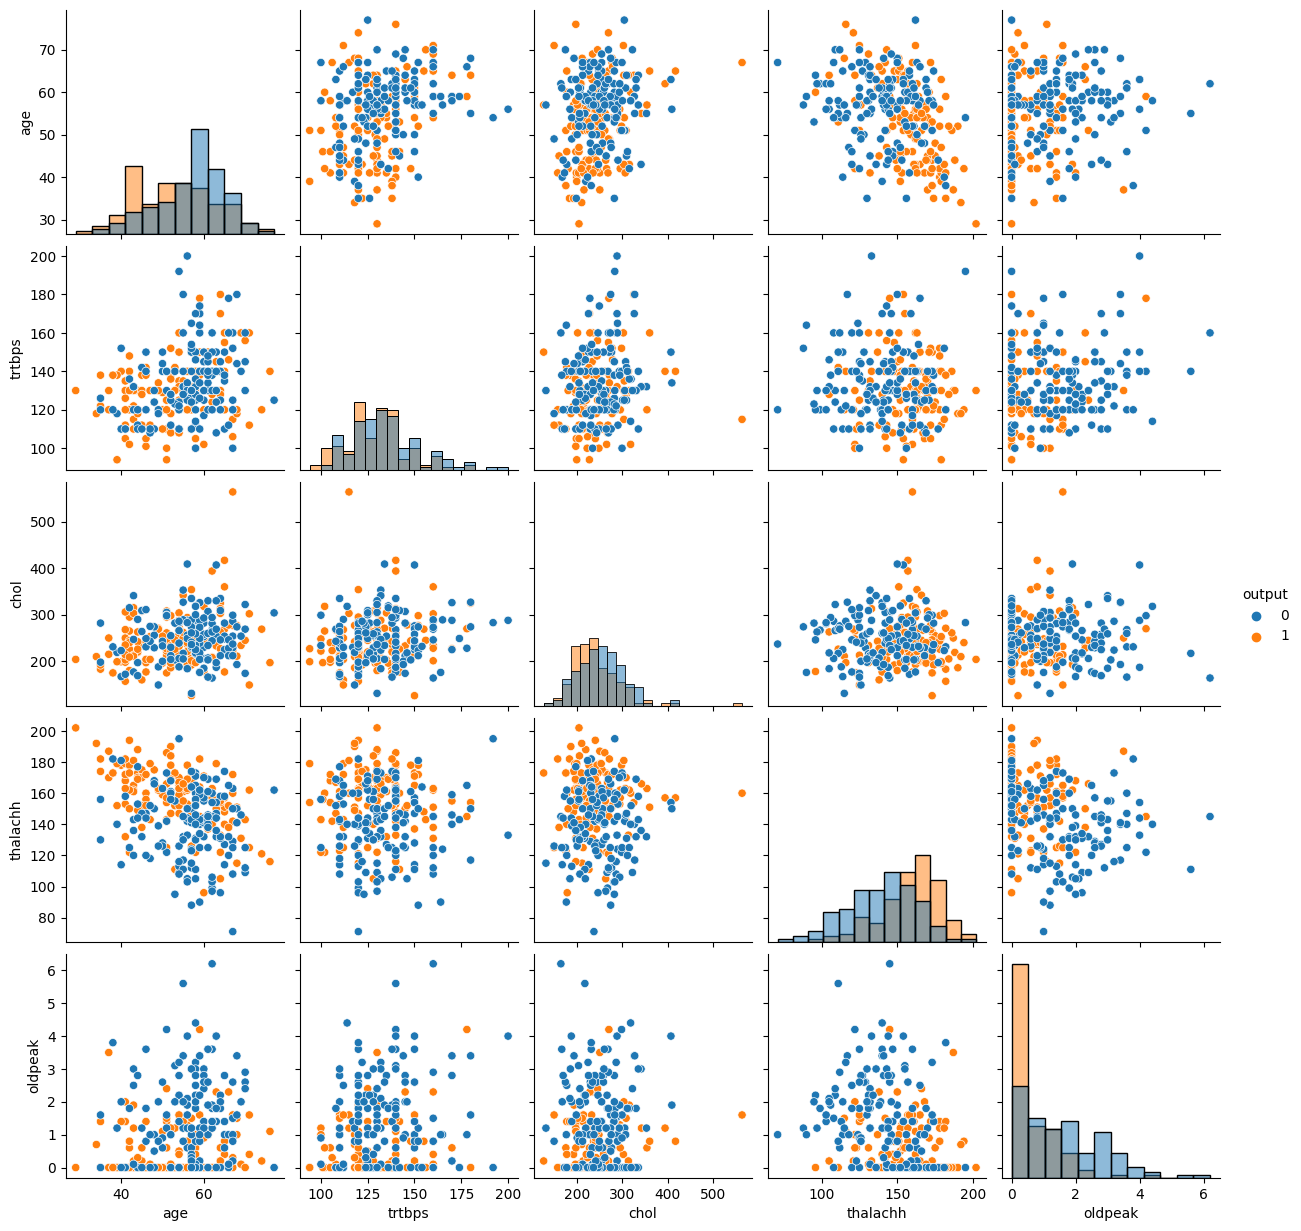

In [464]:
#Numeric Data Visualization
numeric_list=["age", "trtbps","chol","thalachh","oldpeak","output"]
data_numeric=data.loc[:,numeric_list]


sns.pairplot(data=data_numeric,hue='output',diag_kind='hist')
plt.show()

In [465]:
#scaling the data
scaler=StandardScaler()
scaler

StandardScaler()

In [466]:
scaled_array=scaler.fit_transform(data[numeric_list[:]])
scaled_array

array([[ 0.92535296,  0.73740867, -0.25238973,  0.07291623,  1.01865378,
         1.03030989],
       [-1.92389999, -0.10212202,  0.07006894,  1.6725564 ,  2.02789301,
         1.03030989],
       [-1.48555338, -0.10212202, -0.80246629,  1.02405363,  0.26172435,
         1.03030989],
       ...,
       [ 1.47328622,  0.68143996, -1.01111602, -0.31618543,  1.94378974,
        -0.97058178],
       [ 0.26783305, -0.10212202, -2.18714177, -1.4402569 ,  0.09351781,
        -0.97058178],
       [ 0.26783305, -0.10212202, -0.19548526,  1.11052067, -0.91572142,
        -0.97058178]])

In [467]:
pd.DataFrame(scaled_array).describe()

,0,1,2,3,4,5
count,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02
mean,-3.976918e-17,5.037430e-16,-1.590767e-16,2.651279e-16,-1.325639e-16,-2.121023e-16
std,1.001871e+00,1.001871e+00,1.001871e+00,1.001871e+00,1.001871e+00,1.001871e+00
min,-2.800593e+00,-2.116996e+00,-2.281983e+00,-3.342532e+00,-9.157214e-01,-9.705818e-01
25%,-7.458435e-01,-6.618091e-01,-6.933994e-01,-7.052871e-01,-9.157214e-01,-9.705818e-01
50%,1.582464e-01,-1.021220e-01,-1.101286e-01,1.593833e-01,-2.428953e-01,-9.705818e-01
75%,7.061797e-01,4.575651e-01,5.490149e-01,7.214190e-01,5.981374e-01,1.030310e+00
max,2.459566e+00,3.815688e+00,6.026070e+00,2.321059e+00,4.298681e+00,1.030310e+00


In [468]:
df_dummy= pd.DataFrame(scaled_array,columns=numeric_list[:])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.925353,0.737409,-0.252390,0.072916,1.018654,1.03031
1,-1.923900,-0.102122,0.070069,1.672556,2.027893,1.03031
2,-1.485553,-0.102122,-0.802466,1.024054,0.261724,1.03031
3,0.158246,-0.661809,-0.195485,1.283455,-0.242895,1.03031
4,0.267833,-0.661809,2.042757,0.634952,-0.411102,1.03031


In [469]:

data_scaled=df_dummy.drop(columns='output')
data_scaled.head()


,age,trtbps,chol,thalachh,oldpeak
0,0.925353,0.737409,-0.252390,0.072916,1.018654
1,-1.923900,-0.102122,0.070069,1.672556,2.027893
2,-1.485553,-0.102122,-0.802466,1.024054,0.261724
3,0.158246,-0.661809,-0.195485,1.283455,-0.242895
4,0.267833,-0.661809,2.042757,0.634952,-0.411102


In [470]:
data_scaled=pd.concat([data_scaled,data.loc[:,'output']],axis=1 )
data_scaled.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.925353,0.737409,-0.252390,0.072916,1.018654,1.0
1,-1.923900,-0.102122,0.070069,1.672556,2.027893,1.0
2,-1.485553,-0.102122,-0.802466,1.024054,0.261724,1.0
3,0.158246,-0.661809,-0.195485,1.283455,-0.242895,1.0
4,0.267833,-0.661809,2.042757,0.634952,-0.411102,1.0


**BOX PLOT**

In [471]:
data_melt=pd.melt(data_scaled,id_vars='output',var_name='category', value_name= 'value')
data_melt.head(15)

,output,category,value
0,1.0,age,0.925353
1,1.0,age,-1.923900
2,1.0,age,-1.485553
3,1.0,age,0.158246
4,1.0,age,0.267833
5,1.0,age,0.267833
6,1.0,age,0.158246
7,1.0,age,-1.156793
8,NaN,age,-1.375967
9,NaN,age,0.706180


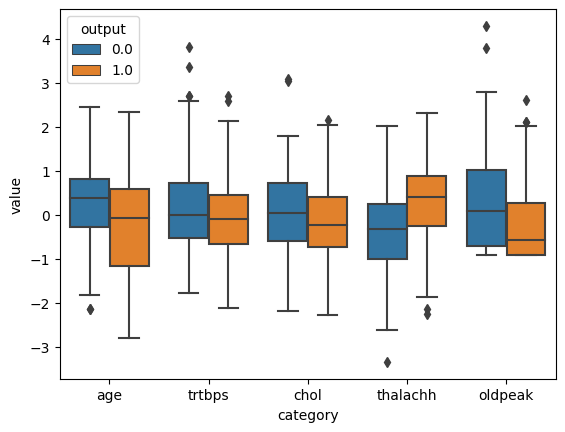

In [472]:
#plt.figure()
sns.boxplot(x='category',y='value',hue='output',data=data_melt)
plt.show()

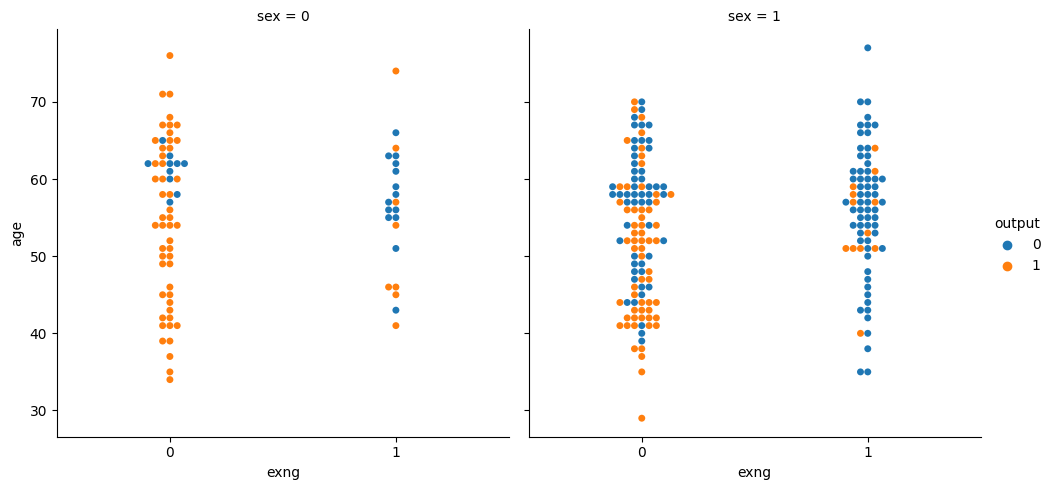

In [473]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = data)
plt.show()

**OUTLINERS DETECTION**

In [474]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = data.loc[:, numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233.0,150.0,2.3
1,37,130,250.0,187.0,3.5
2,41,130,204.0,172.0,1.4
3,56,120,236.0,178.0,0.8
4,57,120,354.0,163.0,0.6


In [475]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,54.555970,0.694030,0.906716,131.824627,246.305970,0.156716,0.533582,148.313433,0.358209,1.088806,1.361940,0.794776,2.347015,0.485075
std,9.142271,0.461679,1.014258,17.900553,52.818568,0.364213,0.528930,23.173476,0.480371,1.191239,0.617752,1.045254,0.620280,0.500712
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,209.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,275.250000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [476]:
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(data.loc[:, i],25)
    Q3 = np.percentile(data.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print(i)
    
    # upper bound
    upper = np.where(data.loc[:, i] >= (Q3 +1.5*IQR))
    
    # lower bound
    lower = np.where(data.loc[:, i] <= (Q1 - 1.5*IQR))
    
    print("{} -- {}".format(upper, lower))

    try:
        data.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        data.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
    
    print("New shape: ", data.shape)
    

age
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (268, 14)
trtbps
(array([ 66,  75, 117, 160, 168, 188, 193, 206, 213, 225, 231, 257],
      dtype=int64),) -- (array([], dtype=int64),)
New shape:  (256, 14)
chol
(array([ 14,  48,  59, 176, 200], dtype=int64),) -- (array([], dtype=int64),)
KeyError: [ 14  48  59 176 200] not found in axis
New shape:  (256, 14)
thalachh
(array([], dtype=int64),) -- (array([225], dtype=int64),)
KeyError: [225] not found in axis
New shape:  (256, 14)
oldpeak
(array([162, 177], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (254, 14)


**MODELING**


In [477]:
m_data=data.copy()
m_data.shape

(254, 14)

In [478]:
m_data=pd.get_dummies(m_data,columns= category_list[:-1], drop_first =True)
m_data.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233.0,150.0,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250.0,187.0,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204.0,172.0,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236.0,178.0,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354.0,163.0,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [479]:
x=m_data.drop(['output',],axis=1)
y=m_data[['output']]

In [480]:
scaler=StandardScaler()
scaler

StandardScaler()

In [481]:
x[numeric_list[:-1]]=scaler.fit_transform(x[numeric_list[:-1]])
x.head()
x.shape

(254, 22)

In [482]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

x_train: (228, 22)
x_test: (26, 22)
y_train: (228, 1)
y_test: (26, 1)


**LOGISTIC REGESSION**

In [483]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [484]:
train_pred=log_model.predict(x_train)
test_pred=log_model.predict(x_test)

train_accuracy= accuracy_score(y_train,train_pred)
test_accuracy= accuracy_score(y_test,test_pred)
f1=f1_score(y_test,test_pred)
precision = precision_score(y_test,test_pred)
recall=recall_score(y_test,test_pred)

results = {
    'Metric': ['Train Accuracy', 'Test Accuracy','F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, test_accuracy,f1, recall, precision]
}
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

+----------------+--------------------+
|     Metric     |       Value        |
+----------------+--------------------+
| Train Accuracy | 0.8947368421052632 |
| Test Accuracy  | 0.7307692307692307 |
|    F1 Score    | 0.8205128205128205 |
|     Recall     | 0.8888888888888888 |
|   Precision    | 0.7619047619047619 |
+----------------+--------------------+


In [485]:
y_pred_prob = log_model.predict_proba(x_test)
y_pred_prob

array([[0.09115746, 0.90884254],
       [0.18872768, 0.81127232],
       [0.05309365, 0.94690635],
       [0.17702245, 0.82297755],
       [0.09703251, 0.90296749],
       [0.08299723, 0.91700277],
       [0.35105184, 0.64894816],
       [0.34449758, 0.65550242],
       [0.08160616, 0.91839384],
       [0.93068604, 0.06931396],
       [0.02661227, 0.97338773],
       [0.46031905, 0.53968095],
       [0.9355803 , 0.0644197 ],
       [0.87245182, 0.12754818],
       [0.38317145, 0.61682855],
       [0.0234071 , 0.9765929 ],
       [0.01914229, 0.98085771],
       [0.2980997 , 0.7019003 ],
       [0.78771373, 0.21228627],
       [0.3051241 , 0.6948759 ],
       [0.11190065, 0.88809935],
       [0.1643683 , 0.8356317 ],
       [0.03867082, 0.96132918],
       [0.97347543, 0.02652457],
       [0.02742517, 0.97257483],
       [0.06308277, 0.93691723]])

In [486]:
y_preds = np.argmax(y_pred_prob, axis = 1)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1], dtype=int64)

In [487]:
print("Test accuracy: {}".format(accuracy_score(y_preds, y_test)))

Test accuracy: 0.7307692307692307


**LINEAR SUPPORT VECTOR CLASSIFICATION**

In [488]:
d_model=LinearSVC()
d_model.fit(x_train,y_train)

train_pred=d_model.predict(x_train)
test_pred=d_model.predict(x_test)

train_accuracy= accuracy_score(y_train,train_pred)
test_accuracy= accuracy_score(y_test,test_pred)
f1=f1_score(y_test,test_pred)
precision = precision_score(y_test,test_pred)
recall=recall_score(y_test,test_pred)

results = {
    'Metric': ['Train Accuracy', 'Test Accuracy','F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, test_accuracy,f1, recall, precision]
}
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


+----------------+--------------------+
|     Metric     |       Value        |
+----------------+--------------------+
| Train Accuracy | 0.9298245614035088 |
| Test Accuracy  | 0.7307692307692307 |
|    F1 Score    | 0.8205128205128205 |
|     Recall     | 0.8888888888888888 |
|   Precision    | 0.7619047619047619 |
+----------------+--------------------+


In [489]:
y_pred_prob_svc = d_model.predict(x_test)
y_pred_prob_svc


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1], dtype=int64)

**ROC CURVE**

In [494]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

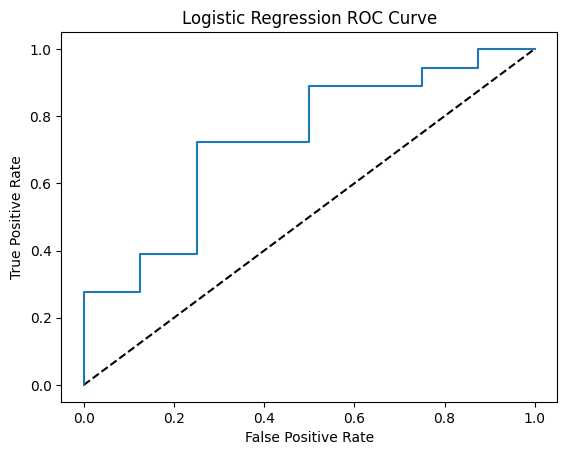

In [495]:
plt.plot([0,1],[0,1],"k--")
plt.plot( fpr,tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()